# Exercise: Regression

In [1]:
from sklearn.datasets import load_boston

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
X.shape

(506, 13)

- $X$ # attributes of a house in Boston (criminality, number of schools, number of bedrooms, etc.)
- $y$ # price per square meter

**Task:** Find a model $y \approx f(X)$ 

**Hint:** 
- Use `mean_squared_error` as loss
- Parity plot instead of confusion matrix.
- `mse` in metrics

In [4]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, train_size=0.8)

### Normalization

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [8]:
X_train[0]

array([3.5100e-02, 9.5000e+01, 2.6800e+00, 0.0000e+00, 4.1610e-01,
       7.8530e+00, 3.3200e+01, 5.1180e+00, 4.0000e+00, 2.2400e+02,
       1.4700e+01, 3.9278e+02, 3.8100e+00])

In [9]:
X_train_scl[0]

array([-0.40114949,  3.65385894, -1.2260954 , -0.24569789, -1.19901595,
        2.231987  , -1.27827402,  0.62368563, -0.63693357, -1.0959901 ,
       -1.75369612,  0.38848167, -1.26639758])

In [10]:
import numpy as np

In [11]:
y_train_scl = np.log(y_train)
y_test_scl = np.log(y_test)

### Different model API for keras

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([
    Dense(10, input_shape=(X_train_scl.shape[1],), activation='sigmoid'), # number of columns on training set
    Dense(1, activation='linear')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="mean_squared_error", metrics=["mse"])

### Using callbacks for our model

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
callbacks = [EarlyStopping(patience=3, min_delta=0.1), ModelCheckpoint('my_best_model.h5', save_best_only=True)]

In [18]:
history = model.fit(X_train_scl, y_train_scl
                    , epochs=20, verbose=1
                    , shuffle=False, validation_split=0.1
                    , callbacks=callbacks
                   ) 

Train on 363 samples, validate on 41 samples
Epoch 1/20
363/363 [==============================] - 1s 2ms/sample - loss: 14.9421 - mse: 14.9421 - val_loss: 14.0820 - val_mse: 14.0820
Epoch 2/20
363/363 [==============================] - 0s 176us/sample - loss: 14.0925 - mse: 14.0925 - val_loss: 13.3807 - val_mse: 13.3807
Epoch 3/20
363/363 [==============================] - 0s 179us/sample - loss: 13.4220 - mse: 13.4220 - val_loss: 12.7442 - val_mse: 12.7442
Epoch 4/20
363/363 [==============================] - 0s 132us/sample - loss: 12.7965 - mse: 12.7965 - val_loss: 12.1379 - val_mse: 12.1379
Epoch 5/20
363/363 [==============================] - 0s 181us/sample - loss: 12.1956 - mse: 12.1956 - val_loss: 11.5531 - val_mse: 11.5531
Epoch 6/20
363/363 [==============================] - 0s 184us/sample - loss: 11.6139 - mse: 11.6139 - val_loss: 10.9869 - val_mse: 10.9869
Epoch 7/20
363/363 [==============================] - 0s 162us/sample - loss: 11.0495 - mse: 11.0495 - val_loss: 10.4

In [19]:
import matplotlib.pyplot as plt

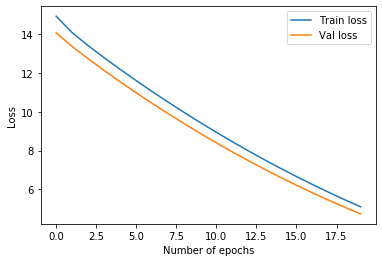

In [20]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()